In [2]:
import sqlite3

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

import itertools

# DATASETS (Properly creating/displaying networks)

In [57]:
def save_graph(graph,file_name):
   #initialze Figure
   plt.figure(num=None, figsize=(50, 50), dpi=100)
   plt.axis('off')
   fig = plt.figure(1)
   pos = nx.spring_layout(graph, seed=22)
   nx.draw_networkx_nodes(graph,pos)
   nx.draw_networkx_edges(graph,pos, alpha=0.5)
   nx.draw_networkx_labels(graph,pos)

   plt.savefig(file_name,bbox_inches="tight")
   pylab.close()
   del fig

In [54]:
def read_edge(gph, n0, n1): #add switch between plus and multiply
    if gph.has_edge(n0, n1):
        gph[n0][n1]['weight'] +=1 #*= 2
        return gph[n0][n1]['weight']
    else:
        gph.add_edge(n0, n1, weight=1)
        return 1

## NIPS

In [4]:
#https://www.kaggle.com/code/kevinvdsk/community-detection

connect = sqlite3.connect('../data/NIPS/database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name AS author_name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2015' AND '2018'
ORDER BY paper_id
"""
df_nips = pd.read_sql(query, connect)

# Have a look at data
df_nips.head(10)

,paper_id,author_id,author_name
0,5633,7865,Leon Gatys
1,5633,7866,Alexander S. Ecker
2,5633,2385,Matthias Bethge
3,5634,7867,Ming Liang
4,5634,7868,Xiaolin Hu
5,5634,3841,Bo Zhang
6,5635,5571,Oriol Vinyals
7,5635,7869,?ukasz Kaiser
8,5635,7870,Terry Koo
9,5635,3753,Slav Petrov


In [49]:
G_NIPS = nx.Graph()

for p, a in df_nips.groupby('paper_id')['author_name']: 
    # TESTING print(a) 
    for a1, a2 in itertools.combinations(a, 2):
        read_edge(G_NIPS, a1, a2)

In [50]:
len(G_NIPS)


3637

In [51]:
save_graph(G_NIPS, "../data/NIPS/graph3.pdf")

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_pdf_ps.py:102: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


## SNAP Emails

In [9]:
df_snap = pd.read_csv("../data/SNAP_Emails/email-Eu-core.txt", sep=" ", names=["from", "to"])
df_snap

,from,to
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7
...,...,...
25566,420,143
25567,174,859
25568,440,460
25569,52,786


In [55]:
G_SNAP = nx.Graph()
df_snap.apply(lambda x: read_edge(G_SNAP, x[0],x[1]), axis=1)
len(G_SNAP)

1005

In [56]:
save_graph(G_SNAP, "../data/SNAP_Emails/graph2.pdf")


## Random Graph Generator (Test)

# COMMUNITY METHODS

# Degree Counting

In [71]:
# Distribution graph + stats

### Degree Counting in NIPS

<BarContainer object of 46 artists>

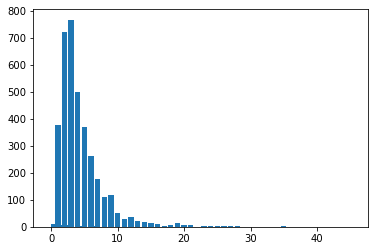

In [73]:
z = nx.degree_histogram(G_NIPS)
plt.hist(z, bins=range(len(z)))
#nx.degree_histogram(G_NIPS)
plt.bar(range(len(z)), z)


# Node Counting

## Pipeline w/ SK

# CLUSTING METHODS

# COMMUNITY + CLUSTER